In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from Gradient import CCDAnalysis, Gradient
from scipy.optimize import curve_fit
from astropy.modeling import models, fitting


In [2]:
no_tile = "LaserData/fl02_X0Y0Z0_26072022_laserscan/laserscan_FITS/fl02_X0Y0Z0_26072022_laserscan_NoTile.fits"
tile = "LaserData/fl02_X0Y0Z0_26072022_laserscan/laserscan_FITS/fl02_X0Y0Z0_26072022_laserscan"

no_tile = "LaserData/fl02_X0Y0Z0_21072022_laserscan/laserscan_FITS/fl02_X0Y0Z0_21072022_laserscan_NoTile.fits"
tile = "LaserData/fl02_X0Y0Z0_21072022_laserscan/laserscan_FITS/fl02_X0Y0Z0_21072022_laserscan"




In [3]:
grad = Gradient()
grad2D = Gradient()
grad2D.analysis2D = True


In [4]:
grad.setNoTile(no_tile)
grad2D.setNoTile(no_tile)

ValueError: setting an array element with a sequence.

In [ ]:
np.rad2deg((grad.theta_x0, grad.theta_y0)), np.rad2deg((grad2D.theta_x0, grad2D.theta_y0))

array([6.23787359, 6.17333122])

In [ ]:
grad.analyzeTile(stem=tile)
grad2D.analyzeTile(stem=tile)

/Users/obriens/AnalysisSoftware/HELIXGradient/Gradient.py:160: RuntimeWarning: invalid value encountered in long_scalars
  x_err = x_err/z_tot - (x_tot/z_tot)**2
/Users/obriens/AnalysisSoftware/HELIXGradient/Gradient.py:163: RuntimeWarning: invalid value encountered in long_scalars
  y_err = y_err/z_tot - (y_tot/z_tot)**2
/Users/obriens/AnalysisSoftware/HELIXGradient/Gradient.py:166: RuntimeWarning: invalid value encountered in long_scalars
  return x_tot/ z_tot, y_tot/ z_tot, x_err, y_err


Error Processing:
LaserData/fl02_X0Y0Z0_21072022_laserscan/laserscan_FITS/fl02_X0Y0Z0_21072022_laserscan_h90_v20.fits
Error Processing:
LaserData/fl02_X0Y0Z0_21072022_laserscan/laserscan_FITS/fl02_X0Y0Z0_21072022_laserscan_h90_v25.fits
Error Processing:
LaserData/fl02_X0Y0Z0_21072022_laserscan/laserscan_FITS/fl02_X0Y0Z0_21072022_laserscan_h95_v35.fits


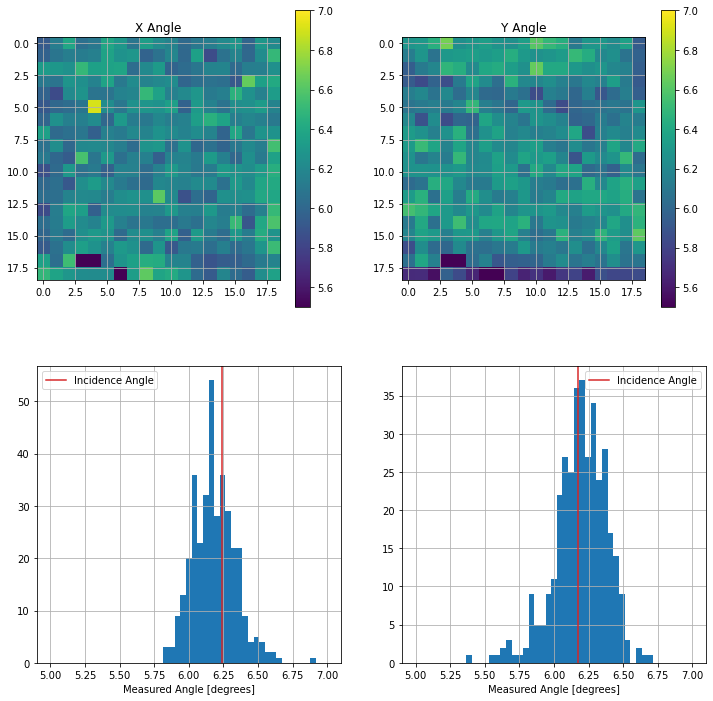

In [ ]:
fig, axs = plt.subplots(2,2, figsize =(12,12))

p0 = axs[0,0].imshow(np.rad2deg(grad.theta_x_data), vmin = 5.5, vmax = 7)
fig.colorbar(p0, ax=axs[0,0])

axs[1,0].hist(np.rad2deg(grad.theta_x_data).ravel(), bins=np.linspace(5,7))
axs[1,0].axvline(np.rad2deg(grad.theta_x0), color = "C3", label = "Incidence Angle")



p1 = axs[0,1].imshow(np.rad2deg(grad.theta_y_data), vmin = 5.5, vmax = 7)
fig.colorbar(p1, ax=axs[0,1])

axs[1,1].hist(np.rad2deg(grad.theta_y_data).ravel(), bins=np.linspace(5,7))
axs[1,1].axvline(np.rad2deg(grad.theta_y0), color = "C3", label = "Incidence Angle")


[ax.grid() for ax in axs.ravel()]

axs[0,0].set_title("X Angle")
axs[0,1].set_title("Y Angle")


axs[1,0].set_xlabel("Measured Angle [degrees]")
axs[1,1].set_xlabel("Measured Angle [degrees]")
axs[1,0].legend()
axs[1,1].legend()


In [ ]:
fig, axs = plt.subplots(2,2, figsize =(12,12))

p0 = axs[0,0].imshow(np.rad2deg(grad2D.theta_x_data), vmin = 5.5, vmax = 7)
fig.colorbar(p0, ax=axs[0,0])

axs[1,0].hist(np.rad2deg(grad2D.theta_x_data).ravel(), bins=np.linspace(5,7))
axs[1,0].axvline(np.rad2deg(grad2D.theta_x0), color = "C3", label = "Incidence Angle")



p1 = axs[0,1].imshow(np.rad2deg(grad2D.theta_y_data), vmin = 5.5, vmax = 7)
fig.colorbar(p1, ax=axs[0,1])

axs[1,1].hist(np.rad2deg(grad2D.theta_y_data).ravel(), bins=np.linspace(5,7))
axs[1,1].axvline(np.rad2deg(grad2D.theta_y0), color = "C3", label = "Incidence Angle")


[ax.grid() for ax in axs.ravel()]

axs[0,0].set_title("X Angle")
axs[0,1].set_title("Y Angle")


axs[1,0].set_xlabel("Measured Angle [degrees]")
axs[1,1].set_xlabel("Measured Angle [degrees]")
axs[1,0].legend()
axs[1,1].legend()


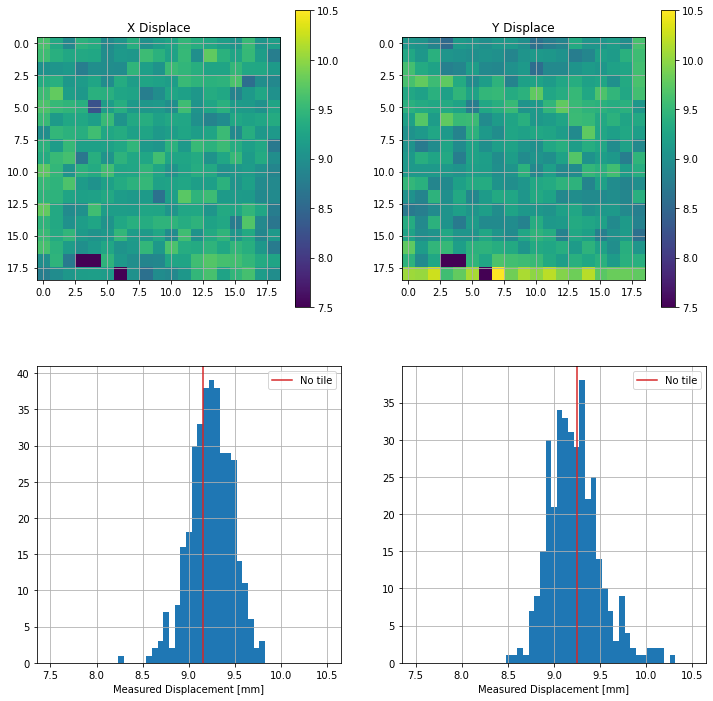

In [ ]:

fig, axs = plt.subplots(2,2, figsize =(12,12))

vmin = 7.5
vmax = 10.5
p0 = axs[0,0].imshow(grad.x_proj_data, vmin = vmin, vmax = vmax)
fig.colorbar(p0, ax=axs[0,0])

axs[1,0].hist(grad.x_proj_data.ravel(), bins=np.linspace(vmin,vmax))
axs[1,0].axvline(grad.x_0_proj, color = "C3", label = "No tile")



p1 = axs[0,1].imshow(grad.y_proj_data, vmin = vmin, vmax = vmax)
fig.colorbar(p1, ax=axs[0,1])

axs[1,1].hist(grad.y_proj_data.ravel(), bins=np.linspace(vmin,vmax))
axs[1,1].axvline(grad.y_0_proj, color = "C3", label = "No tile")


[ax.grid() for ax in axs.ravel()]

axs[0,0].set_title("X Displace")
axs[0,1].set_title("Y Displace")


axs[1,0].set_xlabel("Measured Displacement [mm]")
axs[1,1].set_xlabel("Measured Displacement [mm]")
axs[1,0].legend()
axs[1,1].legend()



fig, axs = plt.subplots(2,2, figsize =(12,12))

vmin = 7.5
vmax = 10.5
p0 = axs[0,0].imshow(grad2D.x_proj_data, vmin = vmin, vmax = vmax)
fig.colorbar(p0, ax=axs[0,0])

axs[1,0].hist(grad2D.x_proj_data.ravel(), bins=np.linspace(vmin,vmax))
axs[1,0].axvline(grad2D.x_0_proj, color = "C3", label = "No tile")



p1 = axs[0,1].imshow(grad2D.y_proj_data, vmin = vmin, vmax = vmax)
fig.colorbar(p1, ax=axs[0,1])

axs[1,1].hist(grad2D.y_proj_data.ravel(), bins=np.linspace(vmin,vmax))
axs[1,1].axvline(grad2D.y_0_proj, color = "C3", label = "No tile")


[ax.grid() for ax in axs.ravel()]

axs[0,0].set_title("X Displace")
axs[0,1].set_title("Y Displace")


axs[1,0].set_xlabel("Measured Displacement [mm]")
axs[1,1].set_xlabel("Measured Displacement [mm]")
axs[1,0].legend()
axs[1,1].legend()


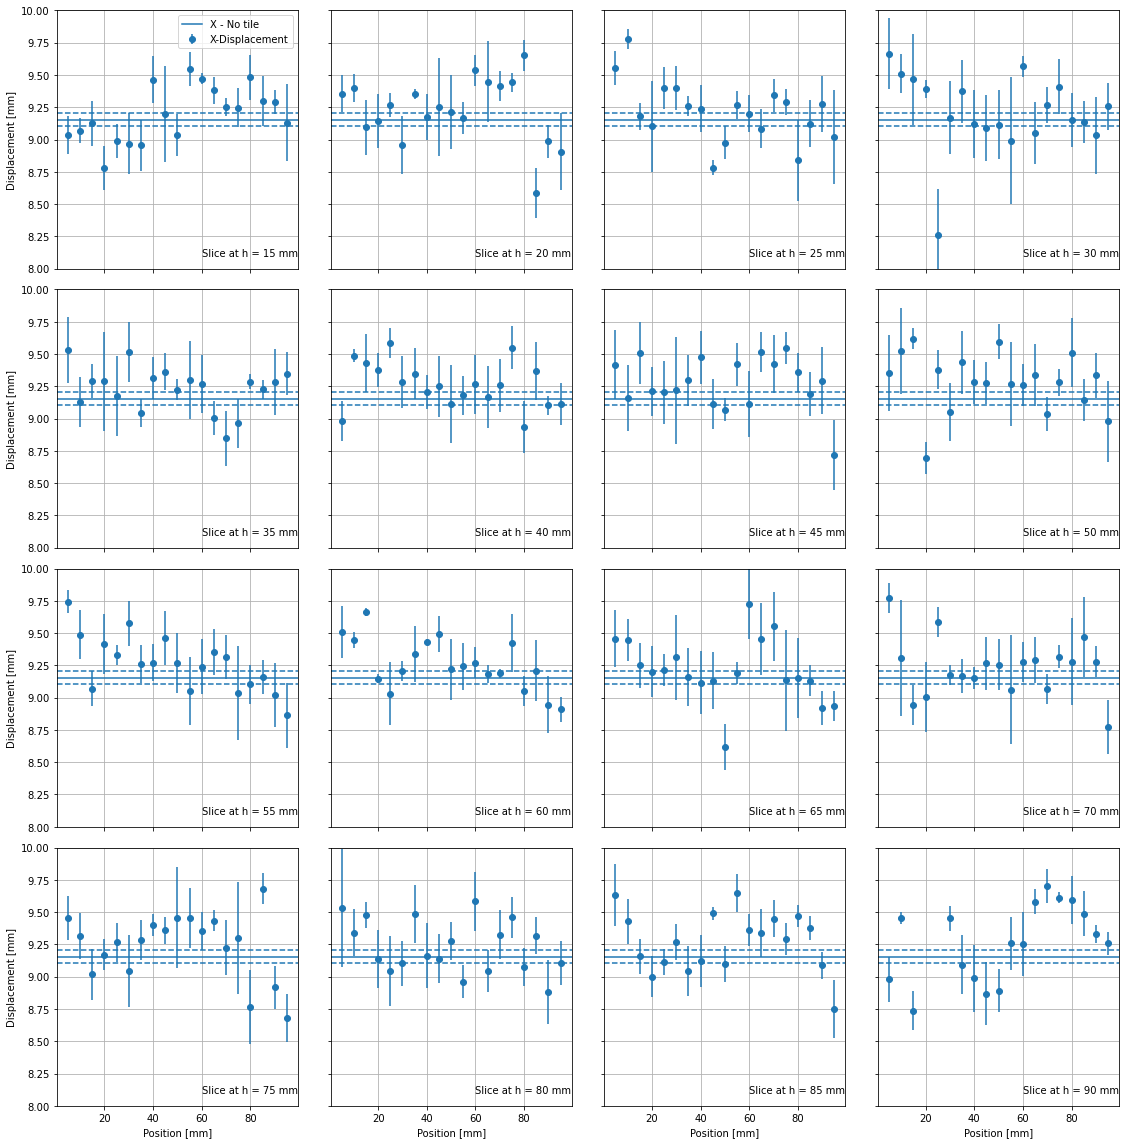

In [ ]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(16,16))
for i, ax in enumerate(axs.ravel()):

    lab = "Slice at h = %d mm"%(grad.h[i+2])
    ax.errorbar(grad.h, grad.x_proj_data[i+2,:], grad.x_err_proj_data[i+2,:], fmt = "C0o", label = "X-Displacement")
    # ax.errorbar(grad.h, grad.y_proj_data[i+2,:], grad.y_err_proj_data[i+2,:], fmt = "C2s", label = "Y-Displacement")


    ax.axhline(grad.x_0_proj, color = "C0", label = "X - No tile")
    # ax.axhline(grad.y_0_proj, color = "C2", label = "Y - No tile")
    ax.axhline(grad.x_0_proj + grad.x_0_proj_err, color = "C0", ls = "--")
    ax.axhline(grad.x_0_proj - grad.x_0_proj_err, color = "C0", ls = "--")


    ax.grid()

    ax.text( 60, 8.1, lab )
axs[0,0].set_ylim(8,10)
axs[0,0].legend()

for i in range(axs.shape[0]):
    axs[i,0].set_ylabel("Displacement [mm]")
    axs[-1,i].set_xlabel("Position [mm]")
    

fig.tight_layout()

In [ ]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(16,16))
for i, ax in enumerate(axs.ravel()):

    lab = "Slice at h = %d mm"%(grad2D.h[i+2])
    ax.errorbar(grad2D.h, grad2D.x_proj_data[i+2,:], grad2D.x_err_proj_data[i+2,:], fmt = "C0o", label = "X-Displacement")
    # ax.errorbar(grad2D.h, grad2D.y_proj_data[i+2,:], grad2D.y_err_proj_data[i+2,:], fmt = "C2s", label = "Y-Displacement")


    ax.axhline(grad2D.x_0_proj, color = "C0", label = "X - No tile")
    # ax.axhline(grad2D.y_0_proj, color = "C2", label = "Y - No tile")
    ax.axhline(grad2D.x_0_proj + grad2D.x_0_proj_err, color = "C0", ls = "--")
    ax.axhline(grad2D.x_0_proj - grad2D.x_0_proj_err, color = "C0", ls = "--")


    ax.grid()

    ax.text( 60, 8.1, lab )
axs[0,0].set_ylim(8,10)
axs[0,0].legend()

for i in range(axs.shape[0]):
    axs[i,0].set_ylabel("Displacement [mm]")
    axs[-1,i].set_xlabel("Position [mm]")
    

fig.tight_layout()

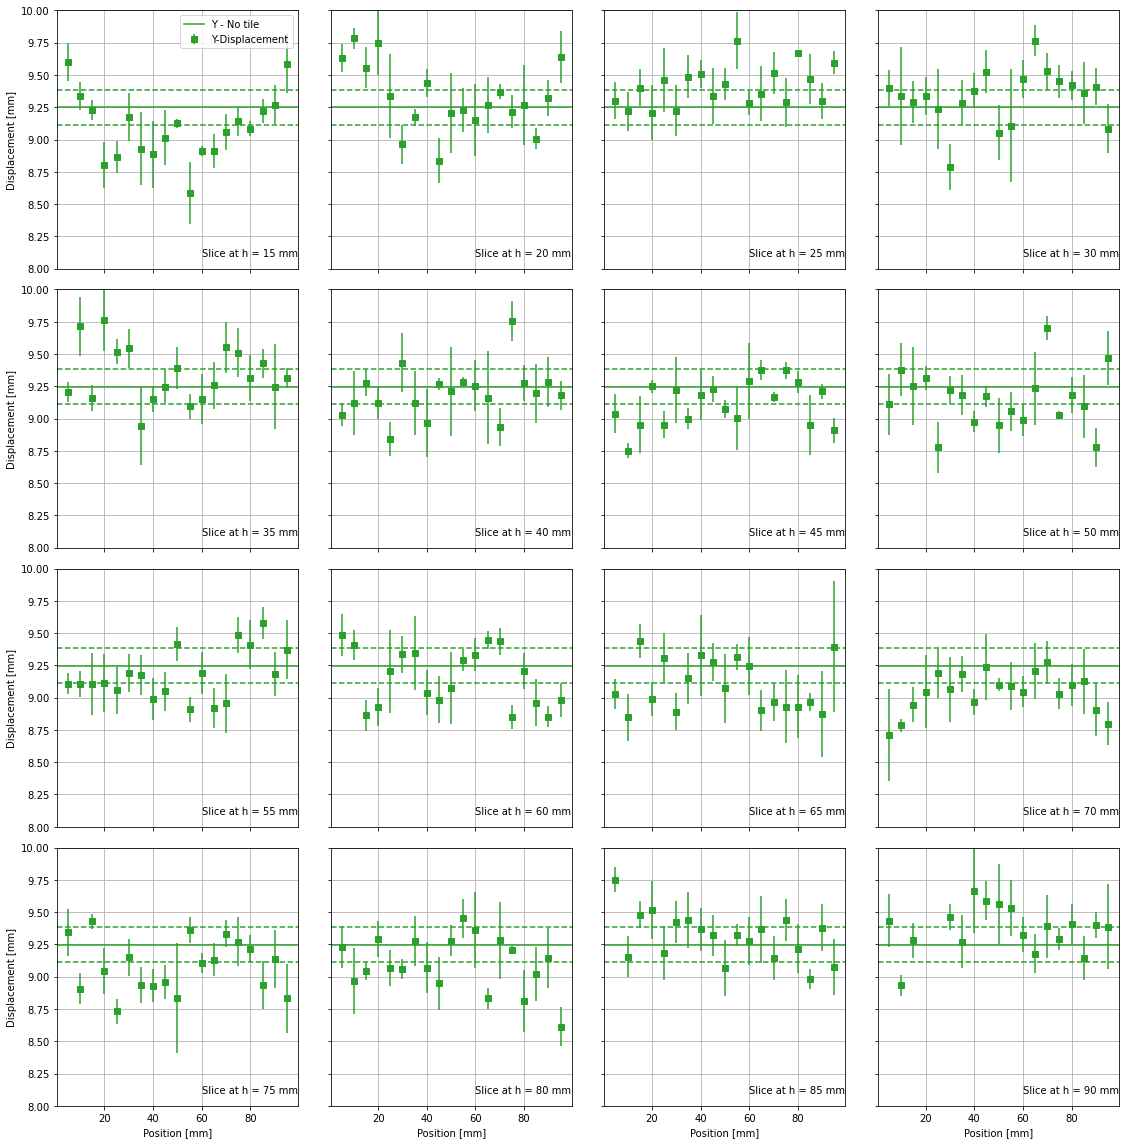

In [ ]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(16,16))
for i, ax in enumerate(axs.ravel()):

    lab = "Slice at h = %d mm"%(grad.h[i+2])
    # ax.errorbar(grad.h, grad.x_proj_data[i+2,:], grad.x_err_proj_data[i+2,:], fmt = "C0o", label = "X-Displacement")
    ax.errorbar(grad.h, grad.y_proj_data[i+2,:], grad.y_err_proj_data[i+2,:], fmt = "C2s", label = "Y-Displacement")


    # ax.axhline(grad.x_0_proj, color = "C0", label = "X - No tile")
    ax.axhline(grad.y_0_proj, color = "C2", label = "Y - No tile")
    ax.axhline(grad.y_0_proj + grad.y_0_proj_err, color = "C2", ls = "--")
    ax.axhline(grad.y_0_proj - grad.y_0_proj_err, color = "C2", ls = "--")

    ax.grid()

    ax.text( 60, 8.1, lab )
axs[0,0].set_ylim(8,10)
axs[0,0].legend()

for i in range(axs.shape[0]):
    axs[i,0].set_ylabel("Displacement [mm]")
    axs[-1,i].set_xlabel("Position [mm]")
    

fig.tight_layout()

In [ ]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(16,16))
for i, ax in enumerate(axs.ravel()):

    lab = "Slice at h = %d mm"%(grad2D.h[i+2])
    # ax.errorbar(grad2D.h, grad2D.x_proj_data[i+2,:], grad2D.x_err_proj_data[i+2,:], fmt = "C0o", label = "X-Displacement")
    ax.errorbar(grad2D.h, grad2D.y_proj_data[i+2,:], grad2D.y_err_proj_data[i+2,:], fmt = "C2s", label = "Y-Displacement")


    # ax.axhline(grad2D.x_0_proj, color = "C0", label = "X - No tile")
    ax.axhline(grad2D.y_0_proj, color = "C2", label = "Y - No tile")
    ax.axhline(grad2D.y_0_proj + grad2D.y_0_proj_err, color = "C2", ls = "--")
    ax.axhline(grad2D.y_0_proj - grad2D.y_0_proj_err, color = "C2", ls = "--")

    ax.grid()

    ax.text( 60, 8.1, lab )
axs[0,0].set_ylim(8,10)
axs[0,0].legend()

for i in range(axs.shape[0]):
    axs[i,0].set_ylabel("Displacement [mm]")
    axs[-1,i].set_xlabel("Position [mm]")
    

fig.tight_layout()

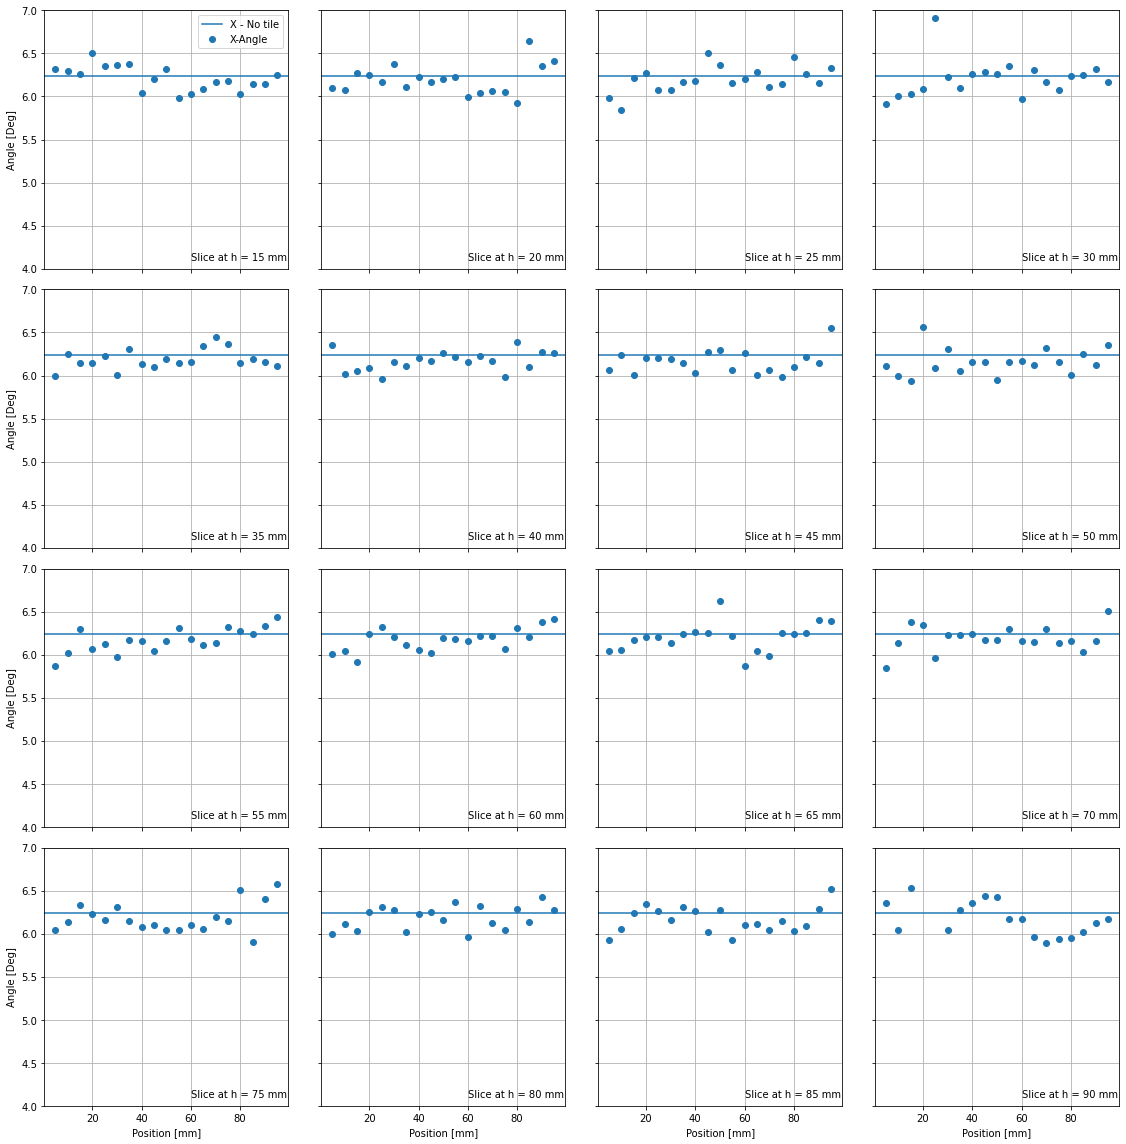

In [ ]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(16,16))
for i, ax in enumerate(axs.ravel()):

    lab = "Slice at h = %d mm"%(grad.h[i+2])
    ax.errorbar(grad.h, np.rad2deg(grad.theta_x_data[i+2,:]), fmt = "C0o", label = "X-Angle")
    # ax.errorbar(grad.h, grad.theta_x_data[i+2,:], grad.y_err_proj_data[i+2,:], fmt = "C2s", label = "Y-Displacement")


    ax.axhline(np.rad2deg(grad.theta_x0), color = "C0", label = "X - No tile")
    # ax.axhline(grad.y_0_proj, color = "C2", label = "Y - No tile")

    ax.grid()

    ax.text( 60, 4.1, lab )
axs[0,0].set_ylim(4,7)
axs[0,0].legend()

for i in range(axs.shape[0]):
    axs[i,0].set_ylabel("Angle [Deg]")
    axs[-1,i].set_xlabel("Position [mm]")
    

fig.tight_layout()

In [ ]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(16,16))
for i, ax in enumerate(axs.ravel()):

    lab = "Slice at h = %d mm"%(grad2D.h[i+2])
    ax.errorbar(grad2D.h, np.rad2deg(grad2D.theta_x_data[i+2,:]), fmt = "C0o", label = "X-Angle")
    # ax.errorbar(grad2D.h, grad2D.theta_x_data[i+2,:], grad2D.y_err_proj_data[i+2,:], fmt = "C2s", label = "Y-Displacement")


    ax.axhline(np.rad2deg(grad2D.theta_x0), color = "C0", label = "X - No tile")
    # ax.axhline(grad2D.y_0_proj, color = "C2", label = "Y - No tile")

    ax.grid()

    ax.text( 60, 4.1, lab )
axs[0,0].set_ylim(4,7)
axs[0,0].legend()

for i in range(axs.shape[0]):
    axs[i,0].set_ylabel("Angle [Deg]")
    axs[-1,i].set_xlabel("Position [mm]")
    

fig.tight_layout()

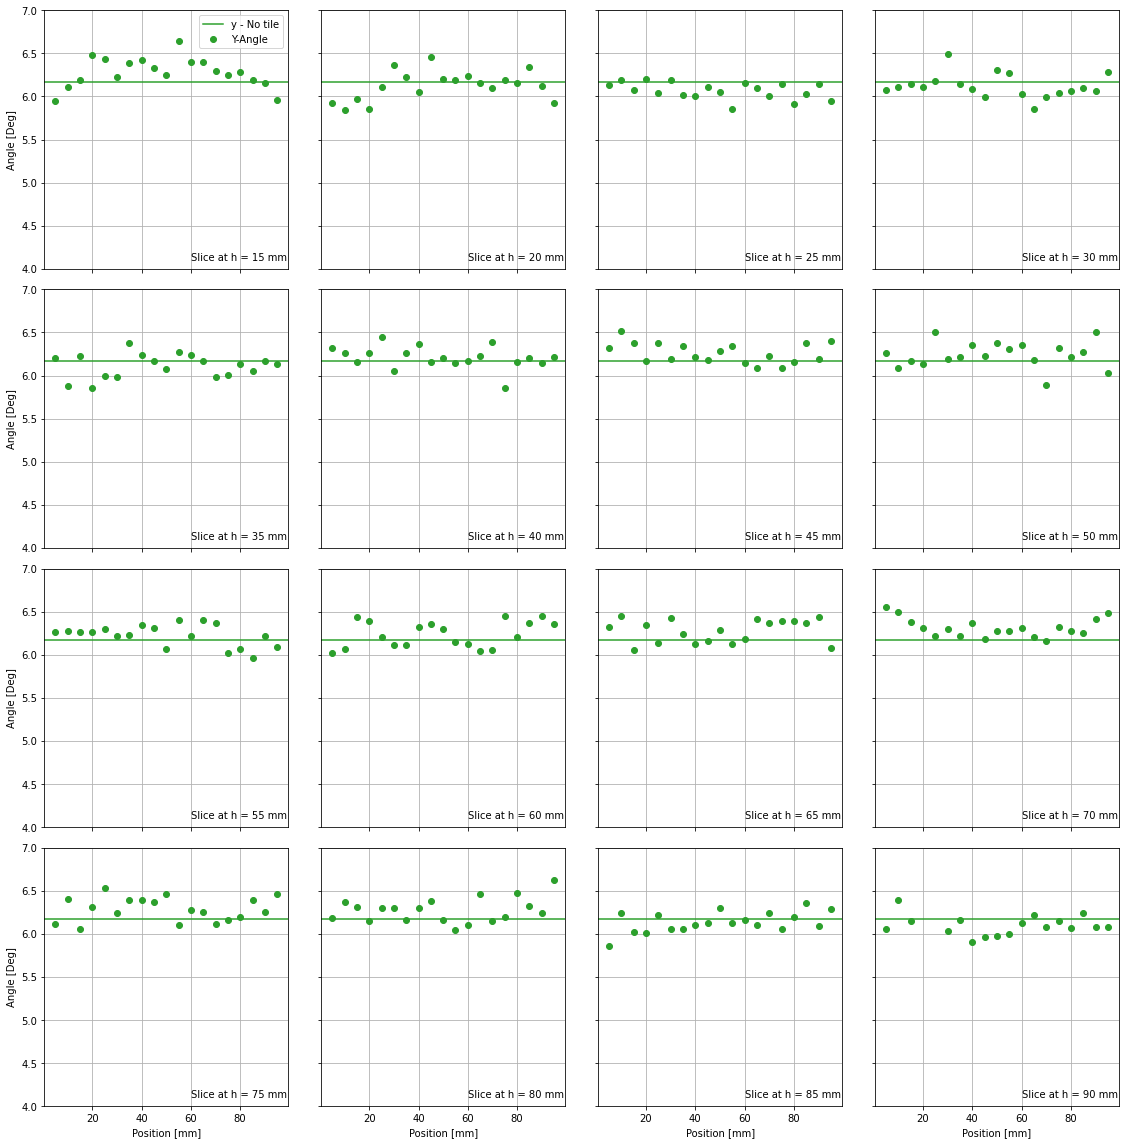

In [ ]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(16,16))
for i, ax in enumerate(axs.ravel()):

    lab = "Slice at h = %d mm"%(grad.h[i+2])
    ax.errorbar(grad.h, np.rad2deg(grad.theta_y_data[i+2,:]), fmt = "C2o", label = "Y-Angle")
    # ax.errorbar(grad.h, grad.theta_x_data[i+2,:], grad.y_err_proj_data[i+2,:], fmt = "C2s", label = "Y-Displacement")


    ax.axhline(np.rad2deg(grad.theta_y0), color = "C2", label = "y - No tile")
    # ax.axhline(grad.y_0_proj, color = "C2", label = "Y - No tile")

    ax.grid()

    ax.text( 60, 4.1, lab )
axs[0,0].set_ylim(4,7)
axs[0,0].legend()

for i in range(axs.shape[0]):
    axs[i,0].set_ylabel("Angle [Deg]")
    axs[-1,i].set_xlabel("Position [mm]")
    

fig.tight_layout()

In [ ]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(16,16))
for i, ax in enumerate(axs.ravel()):

    lab = "Slice at h = %d mm"%(grad2D.h[i+2])
    ax.errorbar(grad2D.h, np.rad2deg(grad2D.theta_y_data[i+2,:]), fmt = "C2o", label = "Y-Angle")
    # ax.errorbar(grad2D.h, grad2D.theta_x_data[i+2,:], grad2D.y_err_proj_data[i+2,:], fmt = "C2s", label = "Y-Displacement")


    ax.axhline(np.rad2deg(grad2D.theta_y0), color = "C2", label = "y - No tile")
    # ax.axhline(grad2D.y_0_proj, color = "C2", label = "Y - No tile")

    ax.grid()

    ax.text( 60, 4.1, lab )
axs[0,0].set_ylim(4,7)
axs[0,0].legend()

for i in range(axs.shape[0]):
    axs[i,0].set_ylabel("Angle [Deg]")
    axs[-1,i].set_xlabel("Position [mm]")
    

fig.tight_layout()

In [ ]:
hdul = fits.open(tile+"_h55_v55.fits")
data = hdul[0].data

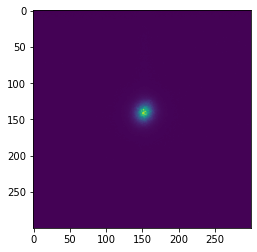

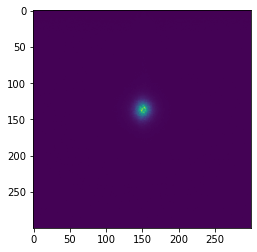

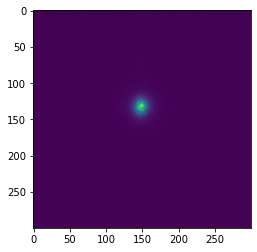

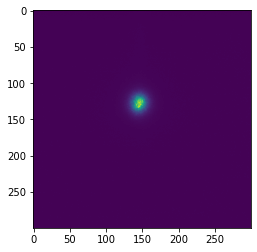

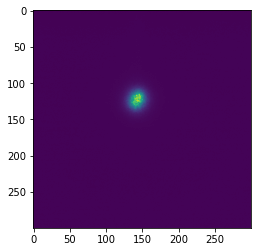

In [ ]:
for i in range(data.shape[0]):
    plt.imshow(data[i,0, :,:])
    plt.show()

In [ ]:
gaus = models.Gaussian2D(amplitude=1000, x_mean=150, y_mean=150, x_stddev= 10, y_stddev= 10, theta= 0)
gaus.theta.constraints = [-np.pi, np.pi]
# gaus = models.Moffat2D(amplitude=1000, x_0=150, y_0=150)
const = models.Const2D(amplitude= 45)
# fitter = fitting.LinearLSQFitter()
fitter = fitting.LevMarLSQFitter()
x = np.arange(300)
xx_mm, yy_mm = np.meshgrid(x,x)

In [ ]:
fittedModel = fitter(gaus + const, xx_mm, yy_mm, data[0,0,:,:],)
fittedModel

<CompoundModel(amplitude_0=1572.9894145, x_mean_0=152.60464181, y_mean_0=140.24526724, x_stddev_0=7.78941451, y_stddev_0=6.83987839, theta_0=8.4010117e+09, amplitude_1=42.05094756)>

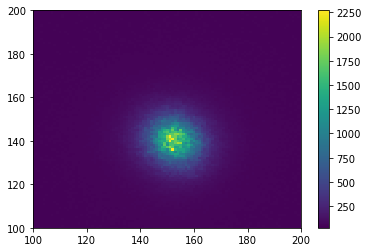

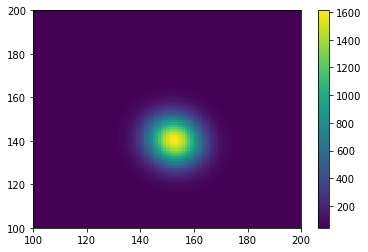

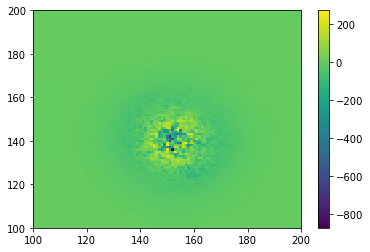

(array([  157.,   196.,   216.,   410.,   443.,   631.,  1364.,  3500.,
         5223.,  8513., 13701., 19799., 13014.,  8387.,  5186.,  2867.,
         1250.,   803.,   482.]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9]),
 <BarContainer object of 19 artists>)

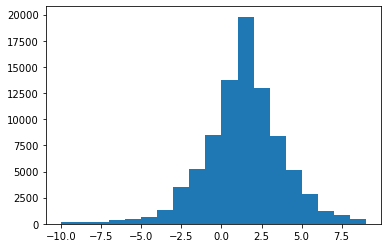

In [ ]:
plt.pcolormesh(xx_mm, yy_mm, data[0,0,:,:])
plt.colorbar()
plt.ylim(100,200)
plt.xlim(100,200)

plt.show()

plt.pcolormesh(xx_mm, yy_mm, fittedModel(xx_mm, yy_mm))
plt.colorbar()
plt.ylim(100,200)
plt.xlim(100,200)

plt.show()


plt.pcolormesh(xx_mm, yy_mm, fittedModel(xx_mm, yy_mm) - data[0,0,:,:])
plt.colorbar()
plt.ylim(100,200)
plt.xlim(100,200)

plt.show()


plt.hist( (fittedModel(xx_mm, yy_mm) - data[0,0,:,:]).ravel(), bins =np.arange(-10,10))

In [ ]:
fitter.fit_info

{'nfev': 62,
 'fvec': array([8.05094756, 9.05094756, 8.05094756, ..., 5.05094756, 1.05094756,
        1.05094756]),
 'fjac': array([[-2.57659602e+03,  5.07236905e+01,  6.69510461e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-7.54076886e+02, -2.13314443e+03, -8.81024760e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-9.95318674e-01,  1.40730821e+00, -2.08346785e+03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-2.98788688e+01, -2.11285178e+01,  2.23637090e-06, ...,
          3.35841284e-03,  3.35841284e-03,  3.35841284e-03],
        [-7.46903337e+00, -5.28164589e+00,  1.23375460e-02, ...,
          1.38414075e-13,  1.38414075e-13,  1.38414075e-13],
        [-8.40886094e-04,  1.31338721e-03, -6.86903943e-07, ...,
          2.34045752e-05,  2.34045752e-05,  2.34045752e-05]]),
 'ipvt': array([5, 4, 2, 3, 7, 1, 6], dtype=int32),
 'qtf': array([ 605.69305783,  451.32947677,   70.501

In [ ]:
np.sqrt(np.diag(fitter.fit_info["param_cov"]))

array([2.32724439e+01, 1.02292662e-01, 1.13949333e-01, 1.52986572e-01,
       1.34281168e-01, 1.68586159e+05, 7.13904759e-01])

In [ ]:
fitter.fit_info

{'nfev': 62,
 'fvec': array([8.05094756, 9.05094756, 8.05094756, ..., 5.05094756, 1.05094756,
        1.05094756]),
 'fjac': array([[-2.57659602e+03,  5.07236905e+01,  6.69510461e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-7.54076886e+02, -2.13314443e+03, -8.81024760e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-9.95318674e-01,  1.40730821e+00, -2.08346785e+03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-2.98788688e+01, -2.11285178e+01,  2.23637090e-06, ...,
          3.35841284e-03,  3.35841284e-03,  3.35841284e-03],
        [-7.46903337e+00, -5.28164589e+00,  1.23375460e-02, ...,
          1.38414075e-13,  1.38414075e-13,  1.38414075e-13],
        [-8.40886094e-04,  1.31338721e-03, -6.86903943e-07, ...,
          2.34045752e-05,  2.34045752e-05,  2.34045752e-05]]),
 'ipvt': array([5, 4, 2, 3, 7, 1, 6], dtype=int32),
 'qtf': array([ 605.69305783,  451.32947677,   70.501